<a href="https://colab.research.google.com/github/PeanutSouth/AnalisisDeDatos-Tucci/blob/main/TP3_WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


diccionario={}
preciosDescuento = []
preciosOriginales = []
descuentos = []
nombres = []

pagina = requests.get("https://www.rappi.com.ar/restaurantes/111444-mcdonalds")
contenido = BeautifulSoup(pagina.content, 'html.parser')
promociones = contenido.find_all("div", class_ = "css-cxew8w", limit = 50) #obtenemos el contenido de los productos

for promocion in promociones:

#  "chakra-text css-773k95"  #Descuento
#  "chakra-text css-kowr8"   #Precio descuento  / orginal (cuando no hay descuento)
#  "chakra-text css-1iteurs"   #Precio original
#  "chakra-text css-puxjan"  #Nombre

  nombres.append(promocion.find(class_="chakra-text css-puxjan").getText())
  if promocion.find(class_="chakra-text css-773k95"):
    preciosDescuento.append(promocion.find(class_="chakra-text css-kowr8").getText())
    descuentos.append(promocion.find(class_="chakra-text css-773k95").getText())
    preciosOriginales.append(promocion.find(class_="chakra-text css-1iteurs").getText())
  else:
    preciosDescuento.append("-")
    descuentos.append("-")
    preciosOriginales.append(promocion.find(class_="chakra-text css-kowr8").getText())

diccionario["Nombre"] = nombres
diccionario["Descuento"] = descuentos
diccionario["Precio con descuento"] = preciosDescuento
diccionario["Precio original"] = preciosOriginales


#for i in range(len(nombres)):          #Muestra
#  print(str(nombres[i]) +" | "+ str(preciosOriginales[i])  +" | "+ str(preciosDescuento[i]) +" | "+ str(descuentos[i])+"\n")


data = pd.DataFrame(diccionario)
data.to_csv("./rappiMacdonalds.csv")

In [107]:

import matplotlib.pyplot as plt
import seaborn as sns

def cuantosDescuentos(data):      #para grafico 1
  result = {}
  result["tienen"] = 0
  result["NoTienen"] = 0
  for i in range(len(data)):
    if(data['Descuento'][i] != "-"):
      result["tienen"] += 1
    else:
      result["NoTienen"] += 1

  return result

def descPorProd(data):            #para grafico 2
  result = {}
  nombres = []
  descuentos = []
  aux = int(len(data))
  if(data.empty):
    return result
  else:
    for i in range(aux):
      if(data['Descuento'][i] != "-"):
        nombres.append(data['Nombre'][i])
        aux= data["Descuento"][i]
        aux = aux.replace("-", "").replace("%", "")
        aux = int(aux)
        descuentos.append(aux)

    result['nombre'] = nombres
    result['descuento'] = descuentos

    return result

def preciosPorProd(data):          #para grafico 3
  result = {}
  nombres = []
  precios = []
  aux = int(len(data))
  if(data.empty):
    return result
  else:
    for i in range(aux):
      nombres.append(data['Nombre'][i])
      if(data['Descuento'][i] != "-"):
        aux = data['Precio con descuento'][i]
        aux = aux.replace("$", "").replace(",", "").replace(".", "").replace(" ", "")
        aux = int(aux)
        precios.append(aux)
      else:
        aux = data['Precio original'][i]
        aux = aux.replace("$", "").replace(",", "").replace(".", "").replace(" ", "")
        aux = int(aux)
        precios.append(aux)

    result['nombre'] = nombres
    result['precio'] = precios

    return result


aux = (cuantosDescuentos(data))   #Grafico 1
aux2 = (descPorProd(data))        #Grafico 2
aux3 = (preciosPorProd(data))     #Grafico 3






892750
775650
609950
625150
547500
547500
179500
622400
1716000
1604150
1758750
1028000
892750
775650


[14, 36]


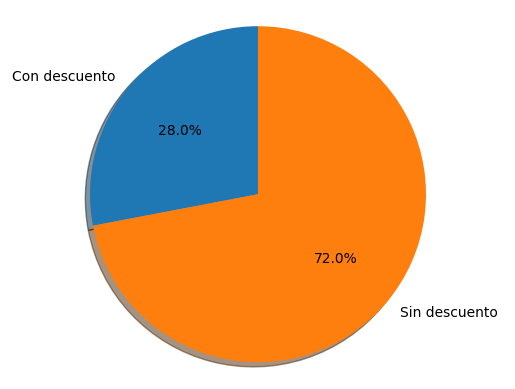

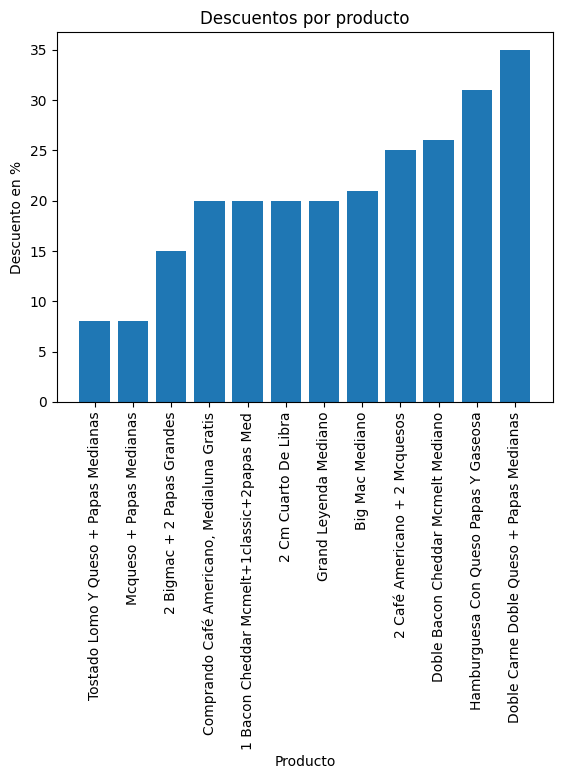

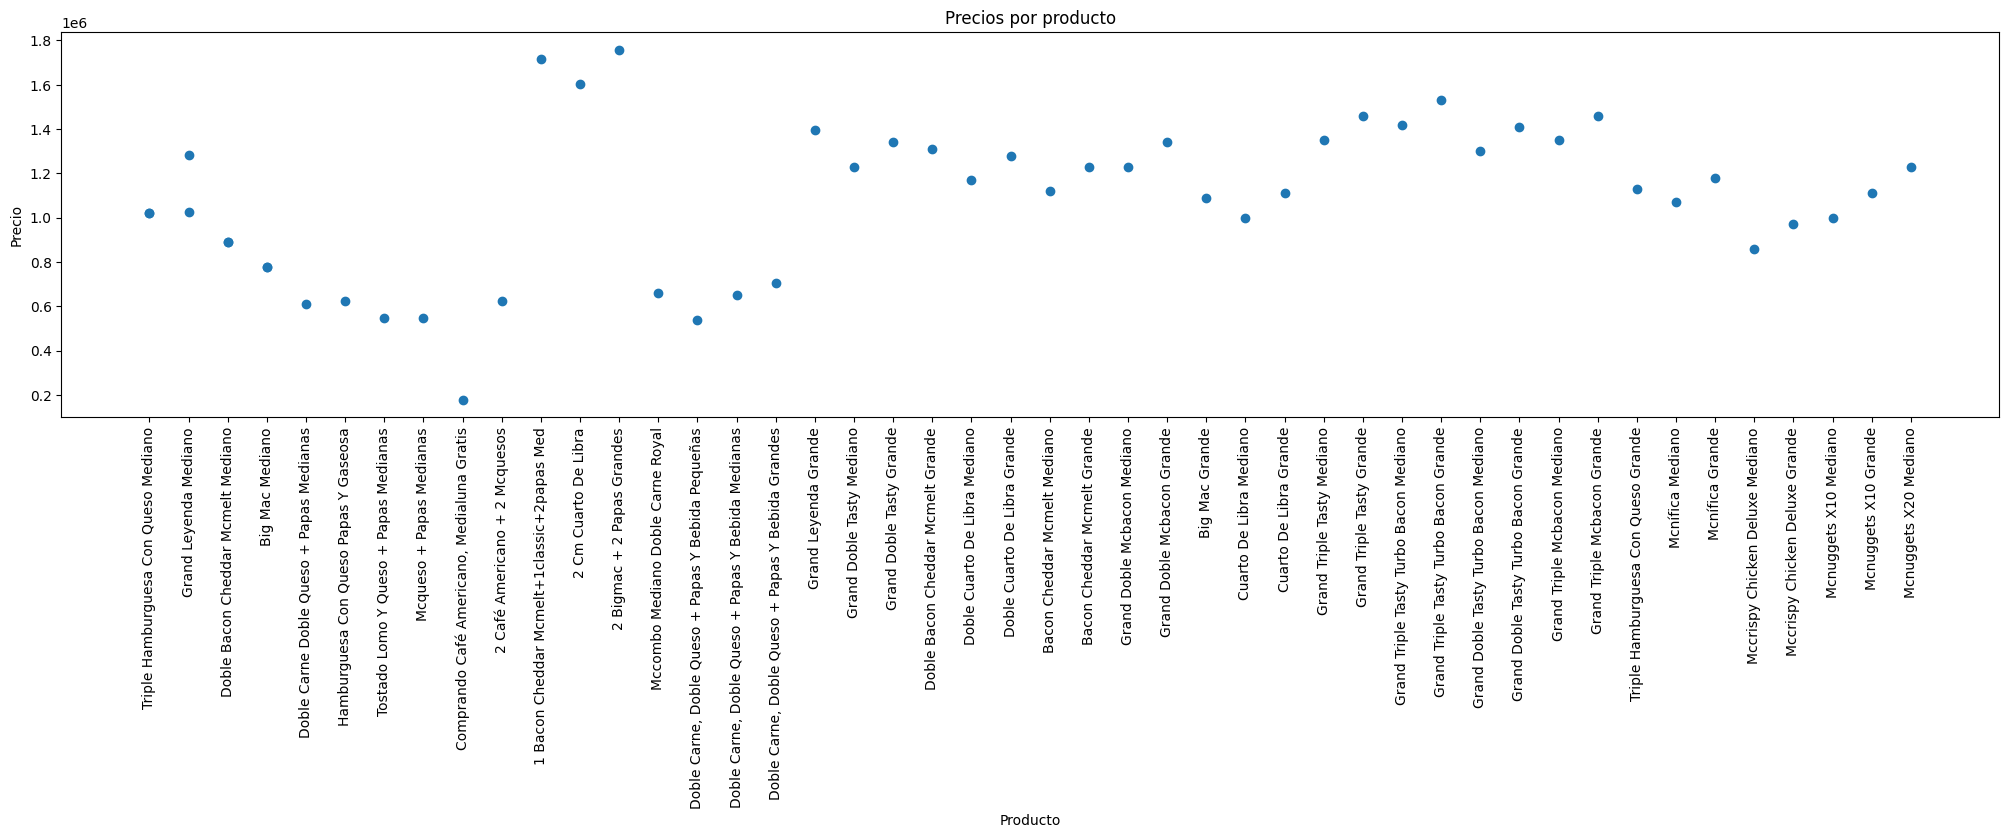

In [119]:
# prompt: Using the data from adove make: a cake char with aux1, a bar char with aux2 and a point chart with aux3

import pandas as pd
import matplotlib.pyplot as plt
# Cake chart with aux1
labels = ['Con descuento', 'Sin descuento']
sizes = list(aux.values())
print(sizes)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()



# Bar chart with aux2
df2 = pd.DataFrame(aux2)
df2 = df2.sort_values(by=['descuento'], ascending=True)
plt.bar(df2['nombre'], df2['descuento'])
plt.xticks(rotation=90)
plt.xlabel("Producto")
plt.ylabel("Descuento en %")
plt.title("Descuentos por producto")
plt.show()

# Point chart with aux3



fig, ax = plt.subplots(figsize = [25,5])
plt.plot(aux3['nombre'], aux3['precio'],'o')
plt.xticks(rotation=90)

plt.xlabel("Producto")
plt.ylabel("Precio")
plt.title("Precios por producto")
plt.show()
